# Refactor bus corridors

In [1]:
import datetime as dt
import geopandas as gpd
import pandas as pd

from siuba import *

import utilities
import A1_rail_ferry_brt as rail_ferry_brt
import B1_bus_corridors as bus_corridors

from shared_utils import rt_utils

GCS_FILE_PATH = utilities.GCS_FILE_PATH

analysis_date = rail_ferry_brt.analysis_date
analysis_date

import dask.dataframe as dd
import dask_geopandas

import numpy as np

import dask_utils

itp_id = 182
date_str = analysis_date.strftime(rt_utils.FULL_DATE_FMT)

/opt/conda/lib/python3.10/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [ ]:
# calitp-analytics-data/data-analyses/high_quality_transit_areas/bus_corridors/182_bus.parquet
#bus_corridor = gpd.read_parquet(f"{GCS_FILE_PATH}bus_corridors/182_bus.parquet")

#bus_corridor2 = gpd.read_parquet("./data/182_bus2.parquet")

In [2]:
FILE_PATH = f"{rt_utils.GCS_FILE_PATH}cached_views/"
        
routelines = gpd.read_parquet(f"{FILE_PATH}routelines_{itp_id}_{date_str}.parquet")
trips = dd.read_parquet(f"{FILE_PATH}trips_{itp_id}_{date_str}.parquet")
stop_times = dd.read_parquet(f"{FILE_PATH}st_{itp_id}_{date_str}.parquet")
stops = dask_geopandas.read_parquet(f"{FILE_PATH}stops_{itp_id}_{date_str}.parquet")


In [3]:
gdf = bus_corridors.single_operator_hqta(routelines, trips, stop_times, stops)

In [4]:
gdf.head(2)

,hqta_segment_id,geometry,am_max_trips,pm_max_trips,hq_transit_corr
0,307378023,"POLYGON ((149207.274 -435741.895, 149207.560 -...",30,30,True
1,3247610421,"POLYGON ((143131.543 -428110.649, 143212.390 -...",10,10,True


In [5]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [6]:
gdf.crs

<Derived Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California.
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

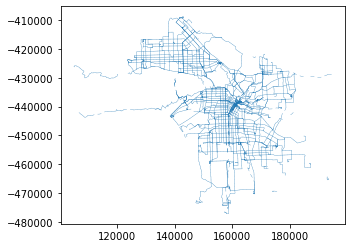

In [7]:
gdf.plot()

In [ ]:
bus_corridor = gpd.read_parquet(f"{GCS_FILE_PATH}bus_corridors/182_bus.parquet")
bus_corridor.head(2)

In [ ]:
bus_corridor.hq_transit_corr.value_counts()